In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#!pip install -q kaggle

In [ ]:
#from google.colab import files

In [ ]:
#files.upload()


In [ ]:
#! mkdir ~/.kaggle


In [ ]:
#! cp kaggle.json ~/.kaggle/


In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#! kaggle competitions download <name-of-competition>
#!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

In [ ]:
!ls -a

In [ ]:
ls


In [ ]:
#!unzip chest-xray-pneumoniacovid19tuberculosis.zip

In [ ]:
ls

In [ ]:
ls

In [ ]:
cd ../


In [ ]:
ls

In [ ]:
import numpy as np # linear algebra

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import random
import os
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

#from keras.utils import plot_model
from sklearn.metrics import classification_report
from collections import Counter
import tensorflow as tf
from keras.utils.vis_utils import plot_model
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

from keras import Model, layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD


#from keras.optimizers import Adam, SGD
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, Input, Conv2D, MaxPooling2D, Flatten,MaxPooling3D

In [ ]:
from keras import regularizers
from keras.layers import Activation,Dense

In [ ]:
import pandas as pd

In [ ]:
#pull from datasets
#   gauss
#seg_train_folders = '/content/gdrive/MyDrive/datasets/gaussian blur/Train/' #one more seg_train folder within
#seg_test_folders = '/content/gdrive/MyDrive/datasets/gaussian blur/Test/'
#seg_pred_folders = '/content/gdrive/MyDrive/val/'

In [ ]:
#pull from datasets
# tint
#seg_train_folders = '/content/gdrive/MyDrive/datasets/tinted images/Train/' #one more seg_train folder within
#seg_test_folders = '/content/gdrive/MyDrive/datasets/tinted images/Test/'
#seg_pred_folders = '/content/gdrive/MyDrive/val/'

In [ ]:
#pull from datasets
# lens
#seg_train_folders = '/content/gdrive/MyDrive/datasets/lens flare/Train/' #one more seg_train folder within
#seg_test_folders = '/content/gdrive/MyDrive/datasets/lens flare/Test/'
#seg_pred_folders = '/content/gdrive/MyDrive/val/'

In [ ]:
#pull from datasets
# lensandgauss
#seg_train_folders = '/content/gdrive/MyDrive/datasets/lensandgauss/Train/' #one more seg_train folder within
#seg_test_folders = '/content/gdrive/MyDrive/datasets/lensandgauss/Test/'
#seg_pred_folders = '/content/gdrive/MyDrive/val/'

In [ ]:
#pull from datasets
# lensandtint
#seg_train_folders = '/content/gdrive/MyDrive/datasets/lensandtint/Train/' #one more seg_train folder within
#seg_test_folders = '/content/gdrive/MyDrive/datasets/lensandtint/Test/'
#seg_pred_folders = '/content/gdrive/MyDrive/val/'

In [ ]:
#pull from datasets
# tintandgauss
#seg_train_folders = '/content/gdrive/MyDrive/datasets/tintandgauss/Train/' #one more seg_train folder within
#seg_test_folders = '/content/gdrive/MyDrive/datasets/tintandgauss/Test/'
#seg_pred_folders = '/content/gdrive/MyDrive/val/'

In [ ]:
#pull from datasets
#all
#seg_train_folders = '/content/gdrive/MyDrive/datasets/All/Train/' #one more seg_train folder within
#seg_test_folders = '/content/gdrive/MyDrive/datasets/All/Test/'
#seg_pred_folders = '/content/gdrive/MyDrive/val/'

In [ ]:
#root_path = '/content/gdrive/MyDrive/Colab Notebooks/skin_images/'
#train_pred_test_folders = os.listdir(root_path)

#seg_train_folders = '/content/train/' #one more seg_train folder within
#seg_test_folders = '/content/test/'
#seg_pred_folders = '/content/testval/'
quantity_tr = {} 
quantity_te = {}
for folder in os.listdir(seg_train_folders):
    quantity_tr[folder] = len(os.listdir(seg_train_folders+folder))

for folder in os.listdir(seg_test_folders):
    quantity_te[folder] = len(os.listdir(seg_test_folders+folder))
    
quantity_train = pd.DataFrame(list(quantity_tr.items()), index=range(0,len(quantity_tr)), columns=['class','count'])
quantity_test = pd.DataFrame(list(quantity_te.items()), index=range(0,len(quantity_te)), columns=['class','count'])

figure, ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x='class',y='count',data=quantity_train,ax=ax[0])
sns.barplot(x='class',y='count',data=quantity_test,ax=ax[1])

print("Number of images in the train set : ", sum(quantity_tr.values()))
print("Number of images in the test set ; ",sum(quantity_te.values()))

plt.show()

In [ ]:
def save_history(history, model_name):
    #convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save to json:  
    hist_json_file = model_name+'_history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)

    # or save to csv: 
    hist_csv_file = model_name+'_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
        
def plot_accuracy_from_history(history, isinception=False):
    color = sns.color_palette()
    if(isinception == False):
        acc = history.history['acc']
        val_acc = history.history['val_acc']
    else:
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
    

    epochs = range(len(acc))

    sns.lineplot(epochs, acc, label='Training Accuracy')
    sns.lineplot(epochs, val_acc,label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()
    plt.show()
    
def plot_loss_from_history(history):
    color = sns.color_palette()
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    
    sns.lineplot(epochs, loss,label='Training Loss')
    sns.lineplot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()
    plt.show()
    
def do_history_stuff(history, history_file_name, isinception=False):
    save_history(history, history_file_name)
    plot_accuracy_from_history(history, isinception)
    plot_loss_from_history(history)

In [ ]:
train_datagen = ImageDataGenerator( rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)

# we are rescaling by 1.0/255 to normalize the rgb values if they are in range 0-255 the values are too high for good model performance. 
train_generator = train_datagen.flow_from_directory(seg_train_folders,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale = 1.0/255.) #we are only normalising to make the prediction, the other parameters were used for agumentation and train weights
validation_generator = validation_datagen.flow_from_directory(seg_test_folders, shuffle=True, batch_size=1, class_mode='categorical', target_size=(150, 150))


In [ ]:
inv_map_classes = {v: k for k, v in validation_generator.class_indices.items()}
print(validation_generator.class_indices)
print(inv_map_classes)

In [ ]:
def show_few_images(number_of_examples=2, predict_using_model=None):
    figure1, ax1 = plt.subplots(number_of_examples,len(os.listdir(seg_train_folders)), figsize=(20,4*number_of_examples))
    ax1 = ax1.reshape(-1)
    axoff_fun = np.vectorize(lambda ax:ax.axis('off'))
    axoff_fun(ax1)
    axs = 0
    for i, folder in enumerate(os.listdir(seg_train_folders)):
        image_ids = os.listdir(os.path.join(seg_train_folders,folder))
        for j in [random.randrange(0, len(image_ids)) for i in range(0,number_of_examples)]:
            
            display = plt.imread(os.path.join(seg_train_folders,folder,image_ids[j]))
            plt.axis('off')
            ax1[axs].imshow(display)
            title = 'True:'+folder
            if(predict_using_model):
                predicted_classname = inv_map_classes[np.argmax(inception_best_model.predict(np.array([display])))]
                title = title+'\nPredict :'+predicted_classname
            ax1[axs].set_title(title)
            axs=axs+1
show_few_images(2)

In [ ]:
from keras import applications


In [ ]:
tf.keras.backend.clear_session()

 # epoch config
benchmark_epoch = 20
vgg_epoch = 20
resnet_epoch = 20
inception_epoch = 20

In [ ]:
img_width, img_height = 150, 150
nb_train_samples = 6000
nb_validation_samples = 770
epochs = 20
batch_size = 32
n_classes = 4


In [ ]:
from keras.applications import densenet
def build_model():
    base_model = densenet.DenseNet121(input_shape=(img_width, img_height, 3),
                                     weights="imagenet",
                                     include_top=False,
                                     pooling='avg')
    for layer in base_model.layers:
      layer.trainable = True

    x = base_model.output
    x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Activation('relu')(x)
    x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Activation('relu')(x)
    predictions = Dense(n_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

In [ ]:
densenet_model = build_model()
densenet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback


# early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
# callbacks_list = [early_stop, reduce_lr]

In [ ]:
filepath = "densenet_-model-{epoch:02d}-{val_acc:.2f}.hdf5"
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=20, min_lr=0.000002)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
history = densenet_model.fit(train_generator,epochs=benchmark_epoch, verbose=1, validation_data = validation_generator,callbacks=[reduce_lr,early_stopping,checkpoint])

densenet_model.save(filepath)
do_history_stuff(history, 'densenet_model')

In [ ]:
#CNN architecture

#random architecture
benchmark_model = Sequential()
# Input here is 4D array (batchsize, height, width, channels) - we have already created the train_generator with batch size 32
# 32 Images of size each 150x150 with 3 color channels will be input into this layer
benchmark_model.add(Conv2D(128, kernel_size=7, activation='relu', input_shape=(150,150,3)))
benchmark_model.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
benchmark_model.add(Conv2D(64, kernel_size=5, activation='relu'))
benchmark_model.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
benchmark_model.add(Flatten())
benchmark_model.add(Dense(128,activation='relu'))
benchmark_model.add(Dense(4,activation='softmax'))

benchmark_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

benchmark_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 144, 128)     18944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 67, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               8

Epoch 1/20
198/198 [==============================] - ETA: 0s - loss: 0.7324 - acc: 0.7404
Epoch 00001: val_acc improved from -inf to 0.73022, saving model to bench_mark_-model-01-0.73.hdf5
198/198 [==============================] - 107s 533ms/step - loss: 0.7324 - acc: 0.7404 - val_loss: 0.6000 - val_acc: 0.7302 - lr: 0.0010
Epoch 2/20
198/198 [==============================] - ETA: 0s - loss: 0.3942 - acc: 0.8512
Epoch 00002: val_acc did not improve from 0.73022
198/198 [==============================] - 106s 534ms/step - loss: 0.3942 - acc: 0.8512 - val_loss: 0.7926 - val_acc: 0.7004 - lr: 0.0010
Epoch 3/20
198/198 [==============================] - ETA: 0s - loss: 0.3179 - acc: 0.8814
Epoch 00003: val_acc improved from 0.73022 to 0.80674, saving model to bench_mark_-model-03-0.81.hdf5
198/198 [==============================] - 105s 529ms/step - loss: 0.3179 - acc: 0.8814 - val_loss: 0.5050 - val_acc: 0.8067 - lr: 0.0010
Epoch 4/20
198/198 [==============================] - ETA: 0s 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


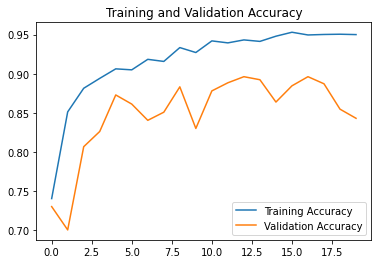

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


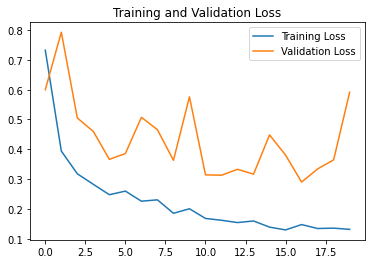

<Figure size 432x288 with 0 Axes>

In [ ]:
filepath = "bench_mark_-model-{epoch:02d}-{val_acc:.2f}.hdf5"
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=20, min_lr=0.000002)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
history = benchmark_model.fit(train_generator,epochs=benchmark_epoch, verbose=1, validation_data = validation_generator,callbacks=[reduce_lr,early_stopping,checkpoint])

benchmark_model.save(filepath)
do_history_stuff(history, 'benchmark_model')